In [ ]:
! pip install numpy matplotlib scikit-learn

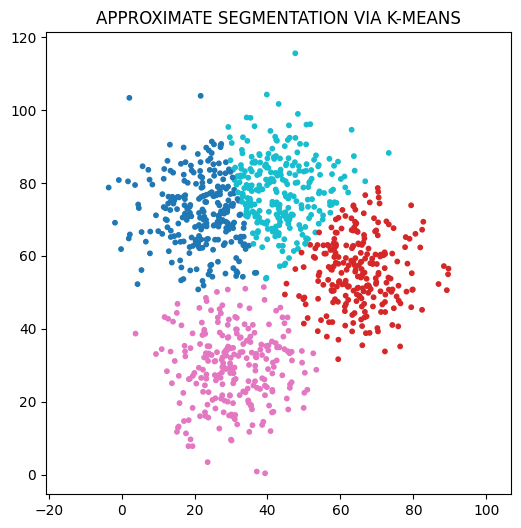

In [1]:
# IMPORT NECESSARY LIBRARIES FOR NUMERICAL COMPUTATION, PLOTTING, AND CLUSTERING
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def generate_synthetic_image(size=100, centers=4, std=10):
    """GENERATE AN ABSTRACT SYNTHETIC IMAGE WITH GAUSSIAN BLOBS"""
    # CREATE SYNTHETIC DATA POINTS CENTERED AROUND MULTIPLE CLUSTERS USING MAKE_BLOBS
    X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=std, center_box=(20, 80), random_state=42)
    
    # INITIALIZE AN EMPTY IMAGE ARRAY WITH GIVEN SIZE
    img = np.zeros((size, size))
    
    # FILL PIXELS WHERE DATA POINTS FALL WITH MAX INTENSITY (255)
    for x, y in X:
        xi, yi = int(x), int(y)
        if 0 <= xi < size and 0 <= yi < size:
            img[yi, xi] = 255
    
    # RETURN THE GENERATED IMAGE AND THE ORIGINAL DATA POINTS
    return img, X

def segment_image_kmeans(X, n_clusters=4):
    """APPLY K-MEANS CLUSTERING TO SYNTHETIC PIXEL DATA"""
    # INITIALIZE K-MEANS CLUSTERING MODEL WITH SPECIFIED NUMBER OF CLUSTERS
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    
    # FIT MODEL AND PREDICT CLUSTER LABELS FOR DATA POINTS
    labels = kmeans.fit_predict(X)
    
    # RETURN THE ASSIGNED CLUSTER LABELS
    return labels

def visualize_segmentation(X, labels):
    """PLOT THE CLUSTERED RESULT IN A 2D SCATTER PLOT"""
    plt.figure(figsize=(6, 6))
    
    # SCATTER PLOT OF DATA POINTS COLORED BY THEIR CLUSTER LABELS
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
    
    # SET PLOT TITLE AND ENSURE EQUAL ASPECT RATIO FOR X AND Y AXES
    plt.title("APPROXIMATE SEGMENTATION VIA K-MEANS")
    plt.axis("equal")
    plt.grid(False)
    plt.show()

def main():
    # GENERATE SYNTHETIC IMAGE AND DATA POINTS
    synthetic_img, X = generate_synthetic_image()
    
    # PERFORM K-MEANS SEGMENTATION ON THE SYNTHETIC DATA POINTS
    labels = segment_image_kmeans(X)
    
    # VISUALIZE THE SEGMENTATION RESULT
    visualize_segmentation(X, labels)

# RUN THE MAIN FUNCTION IF THIS SCRIPT IS EXECUTED DIRECTLY
if __name__ == "__main__":
    main()